# Predicting the white wine-quality using linear regression.

In [1]:
#importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler as sc
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error



In [2]:
#Reading the Dataset
df = pd.read_csv("winequality-white.csv", sep = ';')

#printing the data size and shape 
print("Size of the Data : ",df.size, end = '\n\n')
print("Shape of the Data: ", df.shape, end = '\n\n')


#Printing the information of the Dataset
print("INFORMATION OF THE DATASET")
info = df.info()
print(info,sep = '', end = '\n\n')


#printing the Statistical description of the dataset
print("DESCRIPTION OF THE DATA: ")
df.describe()



Size of the Data :  58776

Shape of the Data:  (4898, 12)

INFORMATION OF THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

DESCRIPTION OF THE DATA: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Observations 

1.From the above information of the Dataset we can observe that there are no missing values in the dataset.

2. There are 11 features or dimensions which are independent which are all of type FLOAT and they are 
    1. fixed acidicty. 
    2. volatile acidicty
    3. citric acid
    4. residual sugar
    5. chlorides 
    6. free sulfur dioxide
    7. total sulfur diaoxide
    8. density
    9. pH-value
    10. Sulphates
    11. alcohol

3. There is one dependent column which is Quality and of data type INTEGER.



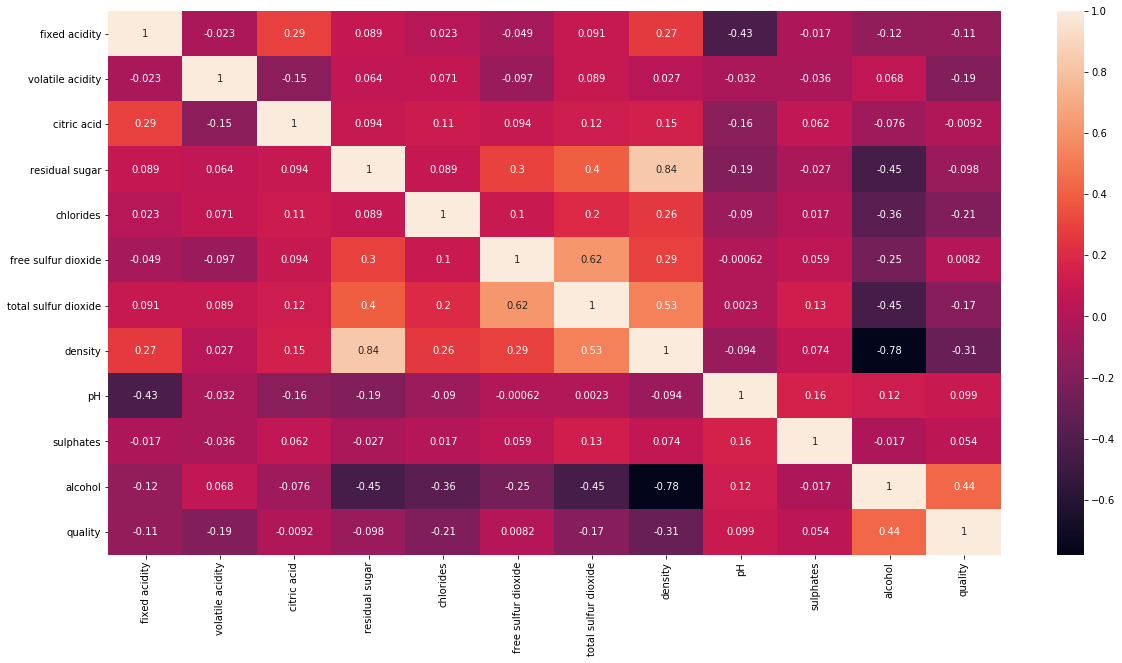

In [3]:
#finding the strength of relationships using correlation coefficient USING HEAT MAPS
fig = plt.figure(figsize = (20,10))
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, annot = True)
plt.show()

### Note : Here colour indications specify the correlation level on both sides of value ZERO(0).

# observations :
1. There are chances of multi-collinearity because there seems to be correlation among the independent variables
   some of them are like 
   1. Alcohol and density.
   2. pH and fixied acidity .
   3. Alcohol and total sulfur dioxide.
   5. Alcohol and residual sugar.
   6. Density and residual sugar. etc.,
    beacuse of which problems may arise while fitting the model.
    
2. when we look at correlation of dependent variable of **quality** of with all other variables we find that **desity is highly negatively correlated** and **alcohol is hightly positively correlated.** 

3. Hence we perform a simple linear regression on independent variable **alcohol** and dependent variable ***quality***.



In [4]:
# Gathering the dependent variable and independent variable into New DataFRame
df_n = df.loc[:, ['alcohol', 'quality']]

#print the new data information
print(df_n.info())

#Statistical description of the new data 
print(df_n.describe())

#correlation matrix of the Dataset
print(df_n.corr())

#print the size  and shape of the Data
print("SIZE: ",df.size)
print("SHAPE: ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  4898 non-null   float64
 1   quality  4898 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 76.7 KB
None
           alcohol      quality
count  4898.000000  4898.000000
mean     10.514267     5.877909
std       1.230621     0.885639
min       8.000000     3.000000
25%       9.500000     5.000000
50%      10.400000     6.000000
75%      11.400000     6.000000
max      14.200000     9.000000
          alcohol   quality
alcohol  1.000000  0.435575
quality  0.435575  1.000000
SIZE:  58776
SHAPE:  (4898, 12)


In [5]:
#Splitting the Data set into traing(80%) and testing(20%) dataset
X_train = df_n.loc[:3918,['alcohol']]
X_test = df_n.loc[3918:,['alcohol']]

y_train = df_n.loc[:3918,['quality']]
y_test  = df_n.loc[3918:, ['quality']]

In [6]:
#normalizing the Data 
scaler = sc()
x_train = scaler.fit_transform(X_train)
x_test  = scaler.fit_transform(X_test)


In [7]:
#Training the model using Linear Regression 
regr = lr()
regr.fit(x_train, y_train)

#Predicting the ouput
y_pred = regr.predict(x_test)

#printing the coefficients
print("Coefficient value of the Data", regr.coef_)


#printing Error rate of the test model
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

Coefficient value of the Data [[0.41443489]]
Mean squared error:  0.5349133902142312


# observations 

1. The Error rate of the model is too low that is  0.535 

2. Low error suggests that model accuracy is very high.


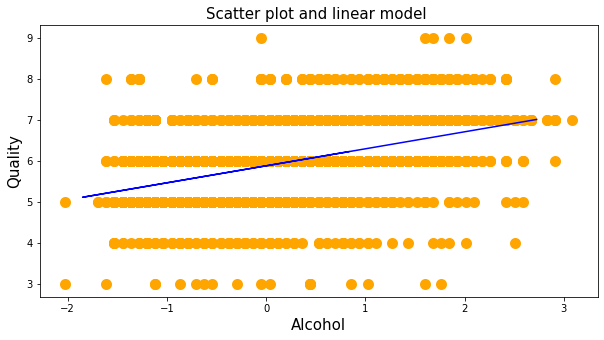

In [8]:
#Plotting the linear model and scatter plot 
fig = plt.figure(figsize = (10,5))

plt.scatter(x_train, y_train, color = 'orange', linewidths = 5)
plt.plot(x_test, y_pred, color = 'blue', )
plt.xlabel("Alcohol", size = 15)
plt.ylabel("Quality", size = 15)

plt.title("Scatter plot and linear model ", size = 15)
plt.show()

# Observations

1. The regression line generated here is said to have a bias of value 5.

2. The model seems to be greatly fitted since it has low cost in testing phase.